# DA Task 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from scipy.stats import zscore
from wordcloud import WordCloud
import nltk

# Importing and Understanding the Data 

In [2]:
df = pd.read_excel('DA -Task 2..xlsx')
df.head()


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [3]:
print("Data Types and Missing Values:")
df.info()

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object   

In [34]:
# Unique values and distribution for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in VIN:
VIN
3hrs9eed0lh255650    2
1hrffhel8rz133325    2
3hcfdde89sh220903    1
3hrffhel3sh345370    1
3hcfdhel2sh305075    1
                    ..
3hrffee82rh175165    1
1hr49se7xrf103023    1
3hnkbhrs8ss220860    1
1hcfdeed5sz117691    1
1hkknxls8mz121378    1
Name: count, Length: 98, dtype: int64

Unique values in CORRECTION_VERBATIM:
CORRECTION_VERBATIM
replaced steering wheel                                                                                                                                                                  7
steering wheel replacement                                                                                                                                                               4
remove and replace steering wheel                                                                                                                                                        2
replaced steering wheel.                                      

In [5]:
print("Summary Statistics for Numerical Columns:")
df.describe()


Summary Statistics for Numerical Columns:


,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434


In [36]:
# Convert categorical columns to lowercase to ensure consistency
for col in categorical_columns:
    df[col] = df[col].str.lower()

# Check the first few rows after cleaning
print("\nData after Cleaning Categorical Columns:")
print(df.head())



Data after Cleaning Categorical Columns:
                 VIN  TRANSACTION_ID  \
0  3hcfdde89sh220903         13021.0   
1  1hrffee8xsz230636         13028.0   
2  1hyksmrk6sz000990         13035.0   
3  3hcfdfel3sh241701         13021.0   
4  1hrffhel1rz181474         13021.0   

                                 CORRECTION_VERBATIM  \
0                   replaced steering wheel now okay   
1  checked - found dtc's u0229 - u1530 set in bcm...   
2  approved 4.9(olh) for added diagnostics with t...   
3                         steering wheel replacement   
4      replaced steering message no longer displayed   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        steering wheel coming apart  2024-01-02   
1         customer states heated steering wheel inop  2024-01-03   
2  owner reports: the super cruise bar on the ste...  2024-01-04   
3  customer states the lettering and finish on th...  2024-01-04   
4  c/s: customer states the service driv

In [31]:
# Check for outliers in numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    print(f"Outliers in {column}:")
    print(df_cleaned[column].describe())  # Get the summary statistics to detect outliers


Outliers in TRANSACTION_ID:
count       75.000000
mean     13035.240000
std          8.740771
min      13021.000000
25%      13029.000000
50%      13036.000000
75%      13040.000000
max      13065.000000
Name: TRANSACTION_ID, dtype: float64
Outliers in DEALER_REGION:
count    75.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: DEALER_REGION, dtype: float64
Outliers in REPAIR_AGE:
count    75.000000
mean     14.520000
std      12.134784
min       0.000000
25%       5.000000
50%      12.000000
75%      21.000000
max      49.000000
Name: REPAIR_AGE, dtype: float64
Outliers in KM:
count       75.000000
mean     23625.453333
std      19113.031336
min          3.000000
25%       8775.000000
50%      17774.000000
75%      34730.500000
max      80805.000000
Name: KM, dtype: float64
Outliers in COMPLAINT_CD_CSI:
count    75.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: COMPLAINT_

# Data Visualization

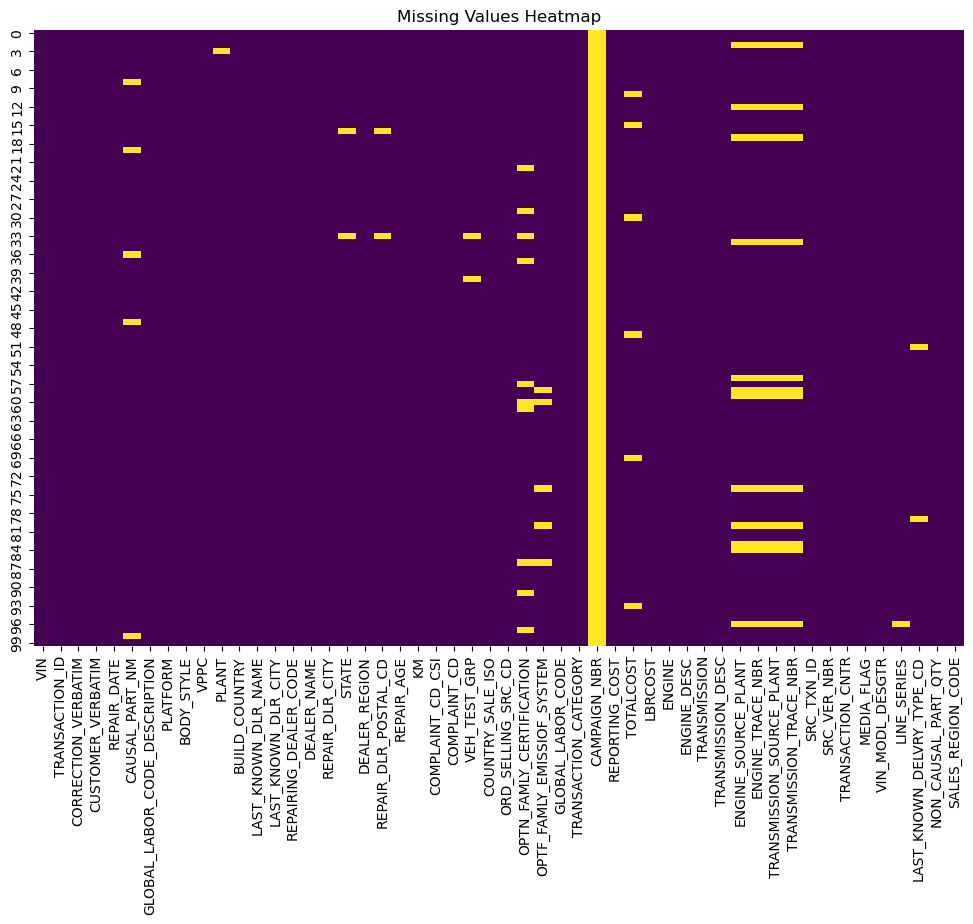

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


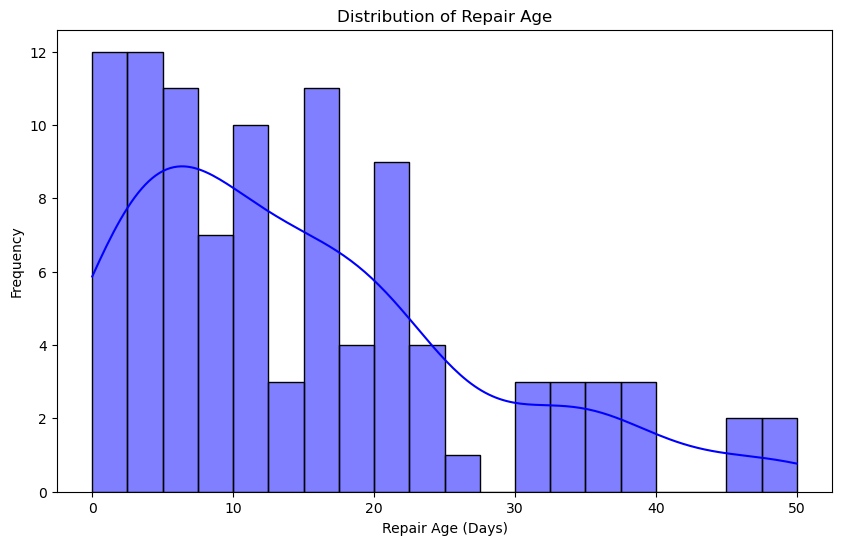

In [8]:
# Histogram of repair age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['REPAIR_AGE'], kde=True, color='blue', bins=20)
plt.title("Distribution of Repair Age")
plt.xlabel("Repair Age (Days)")
plt.ylabel("Frequency")
plt.show()


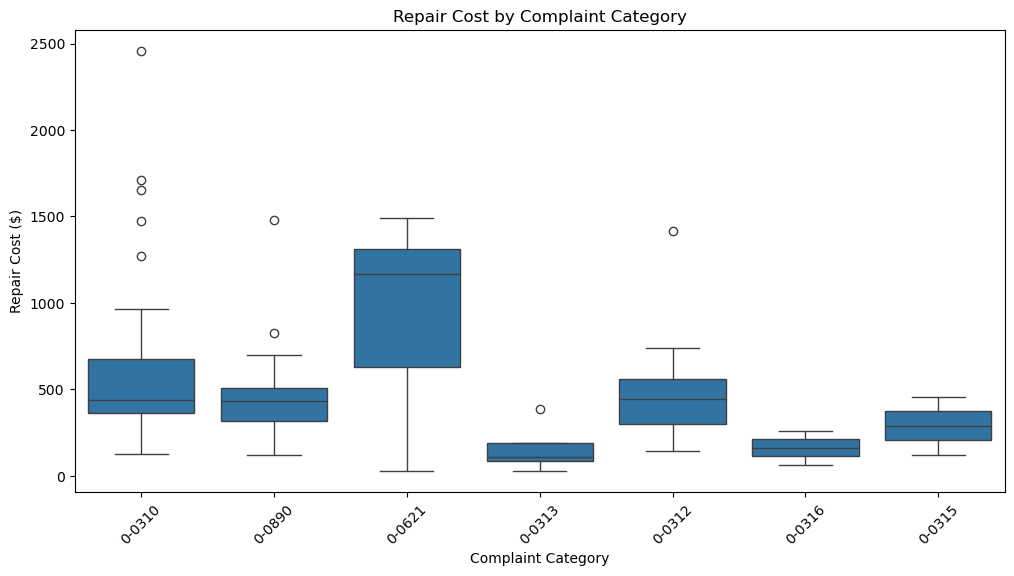

In [9]:
# Boxplot for reporting cost by complaint category
plt.figure(figsize=(12, 6))
sns.boxplot(x='COMPLAINT_CD', y='REPORTING_COST', data=df)
plt.title("Repair Cost by Complaint Category")
plt.xlabel("Complaint Category")
plt.ylabel("Repair Cost ($)")
plt.xticks(rotation=45)
plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_620\1939880522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PLATFORM', y='REPORTING_COST', data=df, palette='Set2')


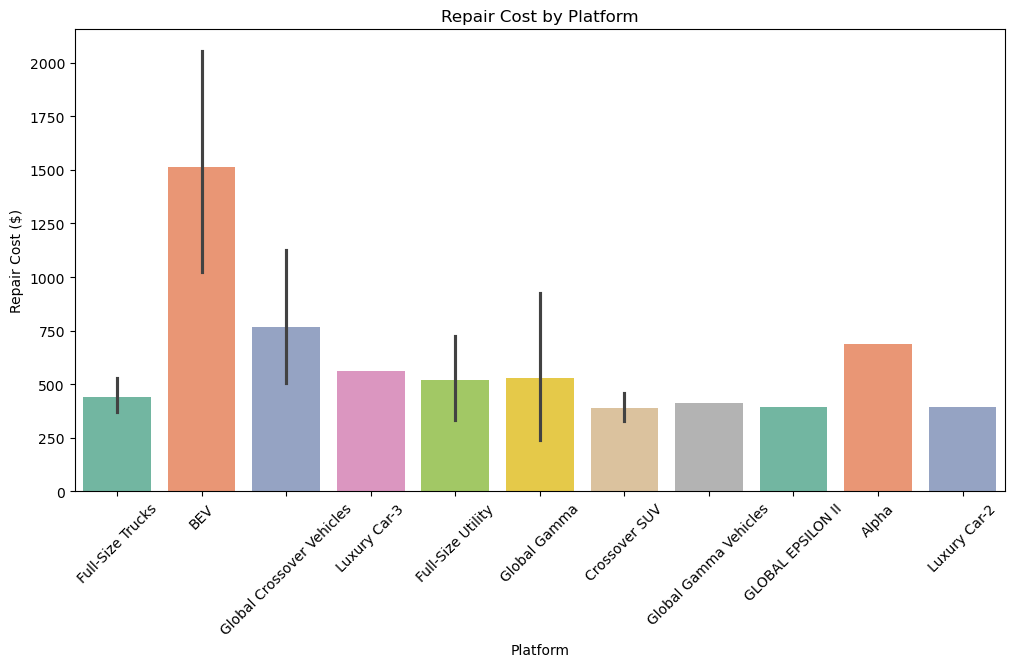

In [10]:
# Bar plot for reporting cost by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='PLATFORM', y='REPORTING_COST', data=df, palette='Set2')
plt.title("Repair Cost by Platform")
plt.xlabel("Platform")
plt.ylabel("Repair Cost ($)")
plt.xticks(rotation=45)
plt.show()


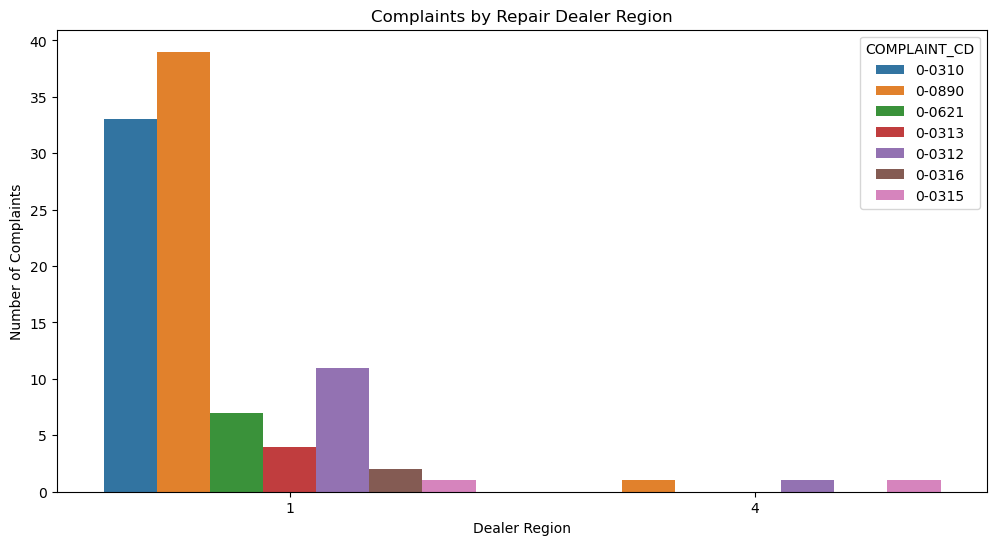

In [11]:
# Countplot for complaints by dealer region
plt.figure(figsize=(12, 6))
sns.countplot(x='DEALER_REGION', hue='COMPLAINT_CD', data=df)
plt.title("Complaints by Repair Dealer Region")
plt.xlabel("Dealer Region")
plt.ylabel("Number of Complaints")
plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_620\3508673127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plant_complaints.index, y=plant_complaints.values, palette='Set1')


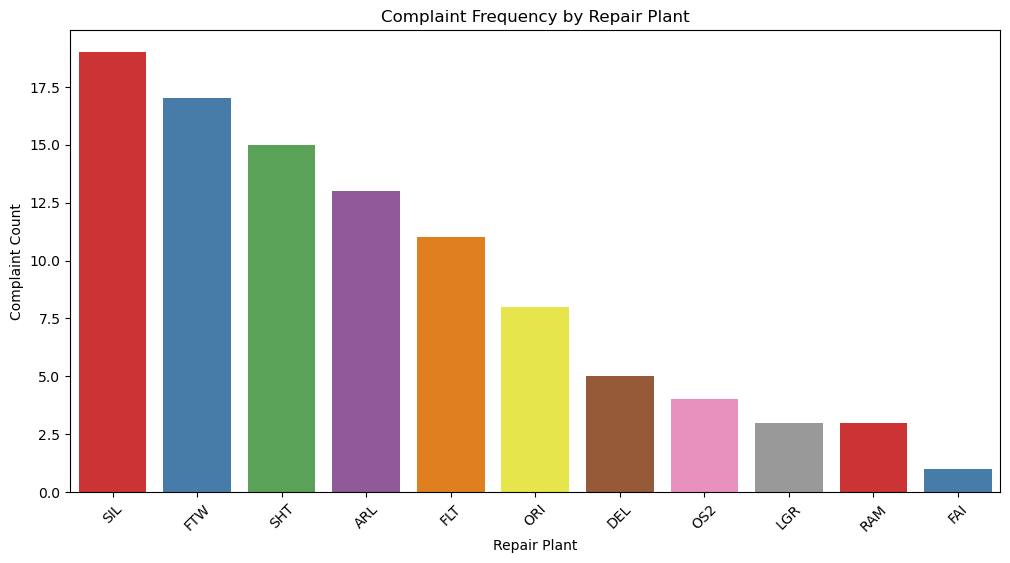

In [12]:
# Bar plot for complaints by repair plant
plt.figure(figsize=(12, 6))
plant_complaints = df['PLANT'].value_counts()
sns.barplot(x=plant_complaints.index, y=plant_complaints.values, palette='Set1')
plt.title("Complaint Frequency by Repair Plant")
plt.xlabel("Repair Plant")
plt.ylabel("Complaint Count")
plt.xticks(rotation=45)
plt.show()


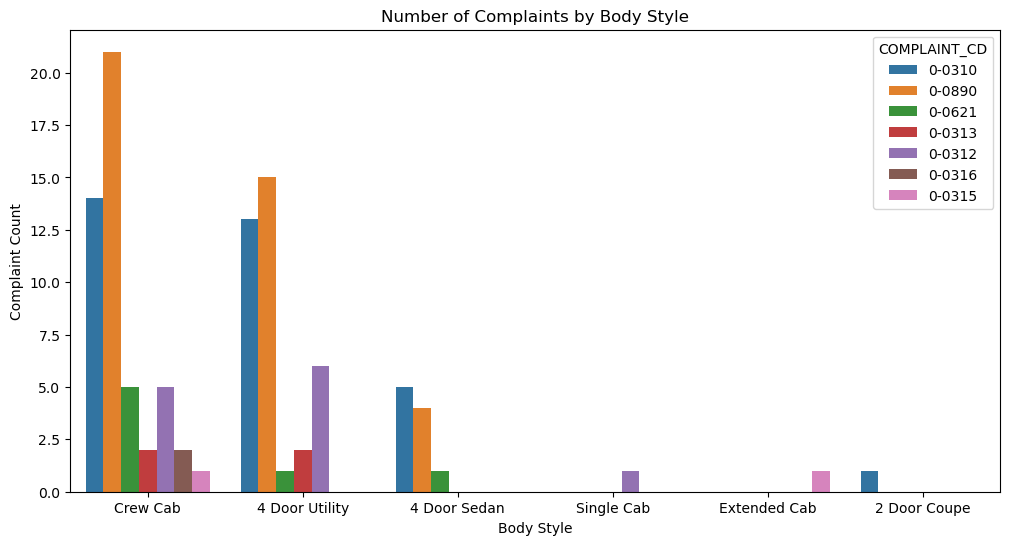

In [13]:
# Countplot for complaints by body style
plt.figure(figsize=(12, 6))
sns.countplot(x='BODY_STYLE', hue='COMPLAINT_CD', data=df)
plt.title("Number of Complaints by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Complaint Count")
plt.show()


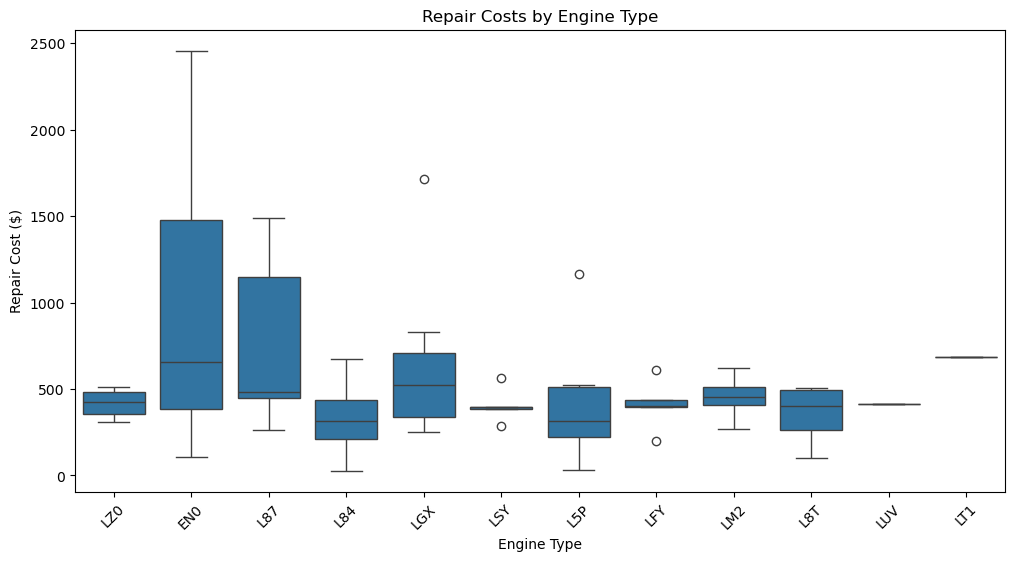

In [14]:
# Boxplot for reporting cost by engine type
plt.figure(figsize=(12, 6))
sns.boxplot(x='ENGINE', y='REPORTING_COST', data=df)
plt.title("Repair Costs by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Repair Cost ($)")
plt.xticks(rotation=45)
plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_620\725584218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_parts.index, y=top_parts.values, palette='Blues_d')


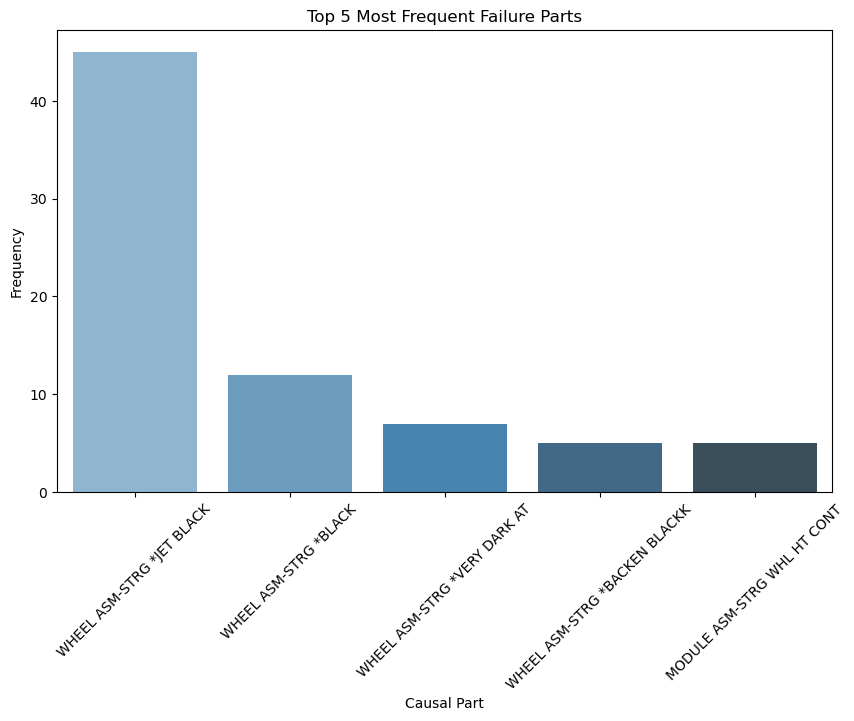

In [15]:
# Bar plot for top 5 frequent causal parts
top_parts = df['CAUSAL_PART_NM'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_parts.index, y=top_parts.values, palette='Blues_d')
plt.title("Top 5 Most Frequent Failure Parts")
plt.xlabel("Causal Part")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# Data Transformation & Cleaning

In [16]:
from sklearn.impute import SimpleImputer

# Identify numerical columns that have at least one non-null value
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_with_data = [col for col in numerical_columns if df[col].isnull().sum() < len(df)]

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns_with_data] = imputer.fit_transform(df[numerical_columns_with_data])

# Handle missing values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Check again for missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())




Missing Values After Imputation:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     0
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              0
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              0
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               0
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       0
COUNTRY_SALE_ISO                   0
ORD_

In [17]:
# Convert categorical columns to lowercase to ensure consistency
for col in categorical_columns:
    df[col] = df[col].str.lower()

# Check the first few rows after cleaning
print("\nData after Cleaning Categorical Columns:")
print(df.head())



Data after Cleaning Categorical Columns:
                 VIN  TRANSACTION_ID  \
0  3hcfdde89sh220903         13021.0   
1  1hrffee8xsz230636         13028.0   
2  1hyksmrk6sz000990         13035.0   
3  3hcfdfel3sh241701         13021.0   
4  1hrffhel1rz181474         13021.0   

                                 CORRECTION_VERBATIM  \
0                   replaced steering wheel now okay   
1  checked - found dtc's u0229 - u1530 set in bcm...   
2  approved 4.9(olh) for added diagnostics with t...   
3                         steering wheel replacement   
4      replaced steering message no longer displayed   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        steering wheel coming apart  2024-01-02   
1         customer states heated steering wheel inop  2024-01-03   
2  owner reports: the super cruise bar on the ste...  2024-01-04   
3  customer states the lettering and finish on th...  2024-01-04   
4  c/s: customer states the service driv

In [18]:
# Detecting outliers using Z-score (threshold = 3)
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = np.abs(zscore(df[numerical_columns]))
outliers = (z_scores > 3).all(axis=1)

# Remove rows with outliers
df_cleaned = df[~outliers]

print(f"\nData shape after removing outliers: {df_cleaned.shape}")



Data shape after removing outliers: (100, 52)



Data shape after removing outliers: (75, 52)


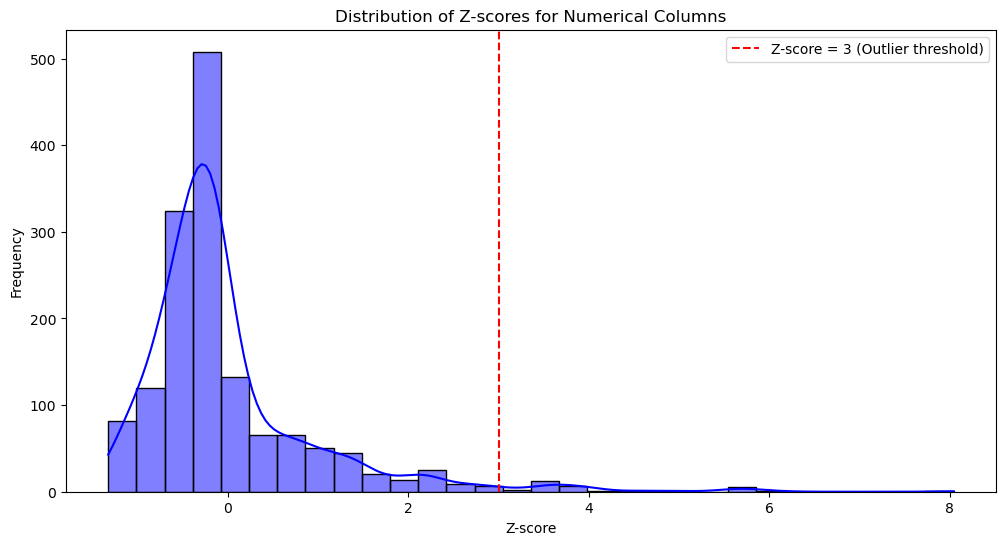

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1800 but corresponding boolean dimension is 100

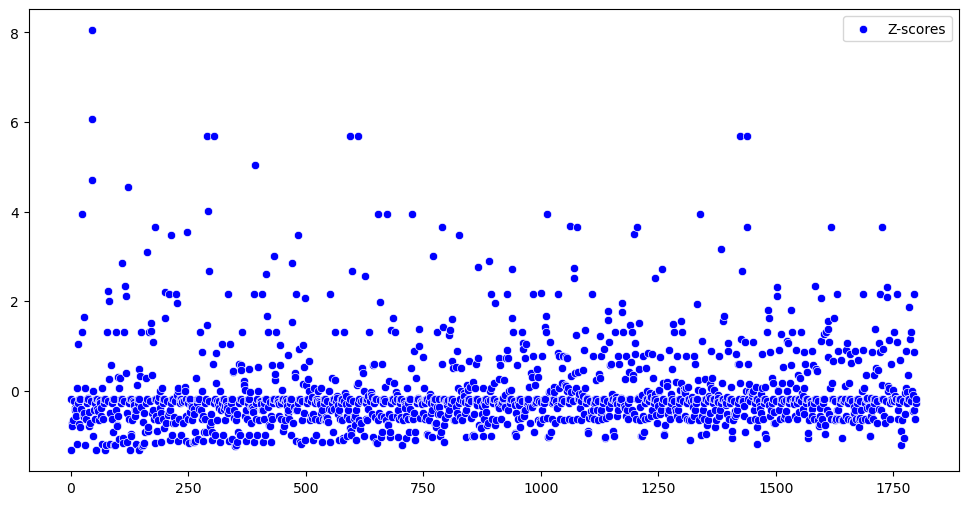

In [19]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
z_scores = zscore(df[numerical_columns].values)
outliers = (np.abs(z_scores) > 3)
outlier_rows = np.any(outliers, axis=1)
df_cleaned = df[~outlier_rows]
print(f"\nData shape after removing outliers: {df_cleaned.shape}")
plt.figure(figsize=(12, 6))
sns.histplot(z_scores.flatten(), bins=30, kde=True, color='blue')
plt.axvline(3, color='red', linestyle='--', label='Z-score = 3 (Outlier threshold)')
plt.title("Distribution of Z-scores for Numerical Columns")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
flat_z_scores = z_scores.flatten()
indices = np.arange(len(flat_z_scores))

sns.scatterplot(x=indices, y=flat_z_scores, color='blue', label='Z-scores')
outlier_indices = indices[outlier_rows]
outlier_z_scores = flat_z_scores[outlier_rows]
plt.scatter(outlier_indices, outlier_z_scores, color='red', label='Outliers')

plt.axhline(3, color='red', linestyle='--', label='Z-score = 3 (Outlier threshold)')
plt.title("Z-scores of Numerical Columns (Outliers Highlighted)")
plt.xlabel("Index")
plt.ylabel("Z-score")
plt.legend()
plt.show()

# Before vs After Outlier Removal - Comparing Data Sizes
df_before_shape = df.shape[0]
df_after_shape = df_cleaned.shape[0]

# Plot before and after data size comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Outlier Removal', 'After Outlier Removal'], y=[df_before_shape, df_after_shape], palette='Set1')
plt.title("Data Size Before and After Outlier Removal")
plt.ylabel("Number of Records")
plt.show()


# Critical Columns



In [20]:
# Critical columns that may provide key insights
critical_columns = ['REPAIR_AGE', 'KM', 'TOTALCOST', 'COMPLAINT_CD', 'GLOBAL_LABOR_CODE_DESCRIPTION']
print(critical_columns)

['REPAIR_AGE', 'KM', 'TOTALCOST', 'COMPLAINT_CD', 'GLOBAL_LABOR_CODE_DESCRIPTION']


## Reasoning:
1. 'REPAIR_AGE' - Vehicle age affects repair frequency and cost.
2. 'KM' - Mileage helps analyze wear and tear patterns.
3. 'TOTALCOST' - Total cost of repairs to assess financial impact.
4. 'COMPLAINT_CD' - Common issues help in understanding recurring complaints.
5. 'GLOBAL_LABOR_CODE_DESCRIPTION' - Identifies the type of repairs performed.
   
## Insights:
1. Patterns in vehicle age and repair frequency.
2. Mileage-related costs can predict wear-and-tear thresholds.
3. Identifying high-cost complaint types for prioritization.
4. Labor codes associated with expensive repairs can be optimized.
5. Cost distribution highlights data skewness or outliers.

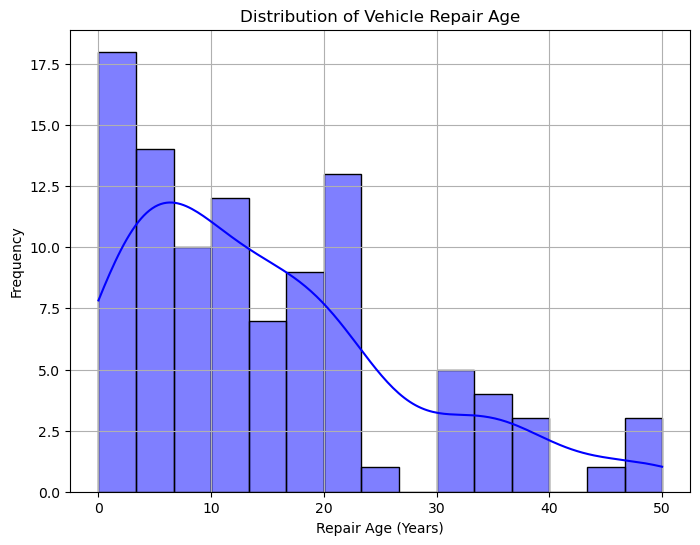

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['REPAIR_AGE'], bins=15, kde=True, color='blue')
plt.title('Distribution of Vehicle Repair Age')
plt.xlabel('Repair Age (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

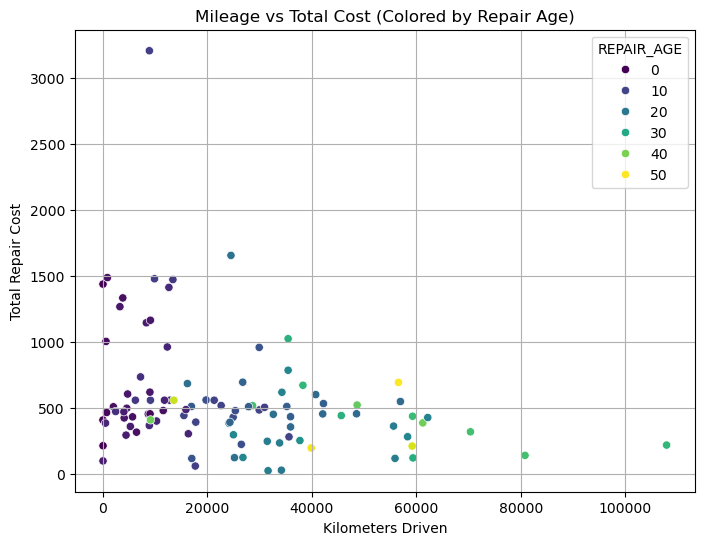

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KM', y='TOTALCOST', data=df, hue='REPAIR_AGE', palette='viridis')
plt.title('Mileage vs Total Cost (Colored by Repair Age)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Total Repair Cost')
plt.grid(True)
plt.show()

C:\Users\tanis\AppData\Local\Temp\ipykernel_620\332982668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='COMPLAINT_CD', data=df, order=df['COMPLAINT_CD'].value_counts().index, palette='coolwarm')


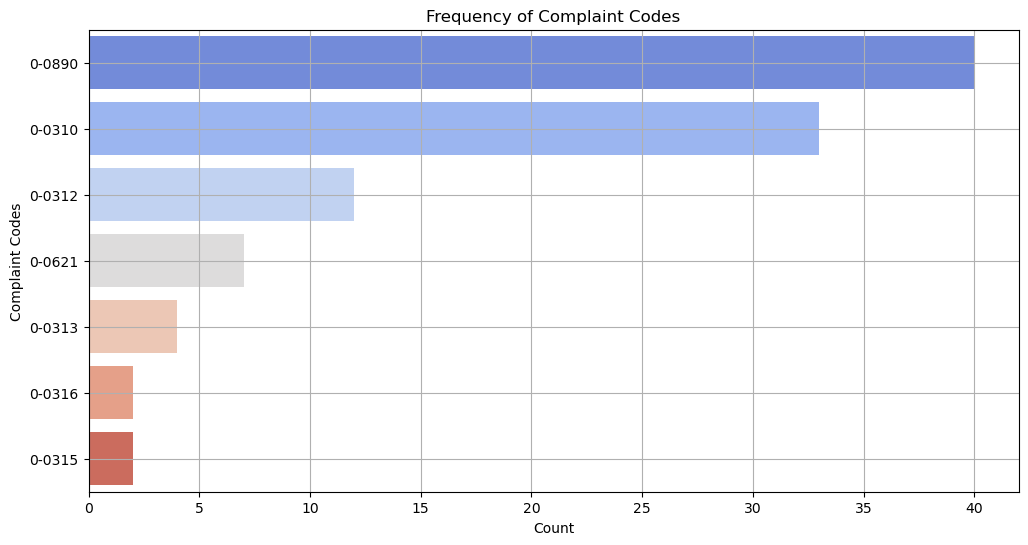

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(y='COMPLAINT_CD', data=df, order=df['COMPLAINT_CD'].value_counts().index, palette='coolwarm')
plt.title('Frequency of Complaint Codes')
plt.xlabel('Count')
plt.ylabel('Complaint Codes')
plt.grid(True)
plt.show()

C:\Users\tanis\AppData\Local\Temp\ipykernel_620\3598131651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TOTALCOST', y='GLOBAL_LABOR_CODE_DESCRIPTION', data=df, palette='pastel')


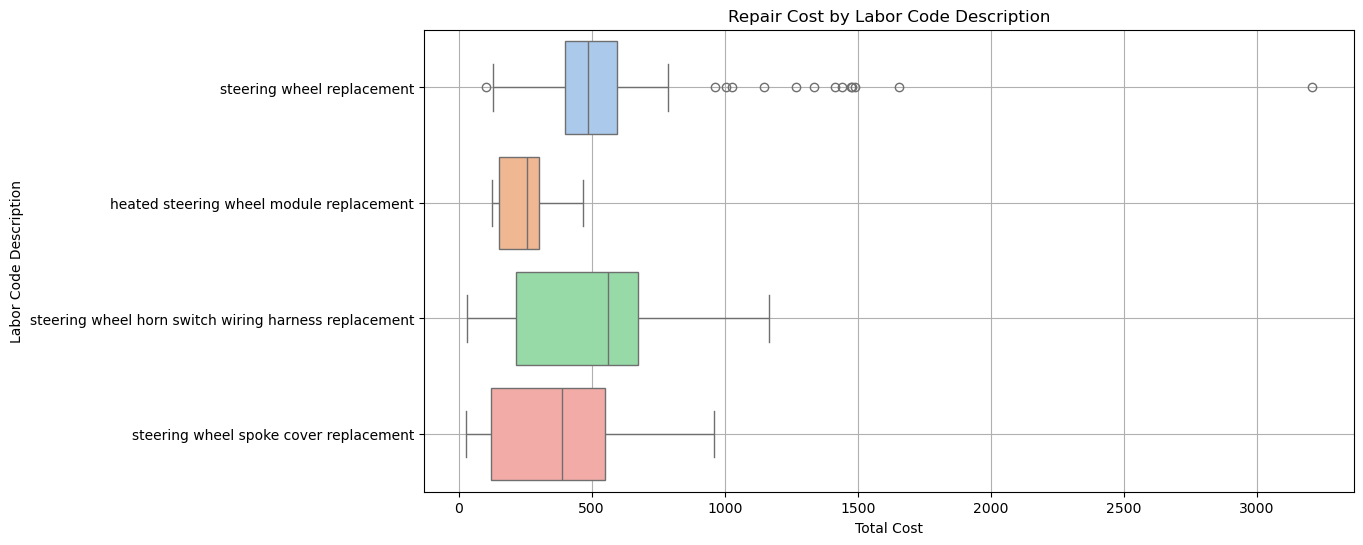

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TOTALCOST', y='GLOBAL_LABOR_CODE_DESCRIPTION', data=df, palette='pastel')
plt.title('Repair Cost by Labor Code Description')
plt.xlabel('Total Cost')
plt.ylabel('Labor Code Description')
plt.grid(True)
plt.show()

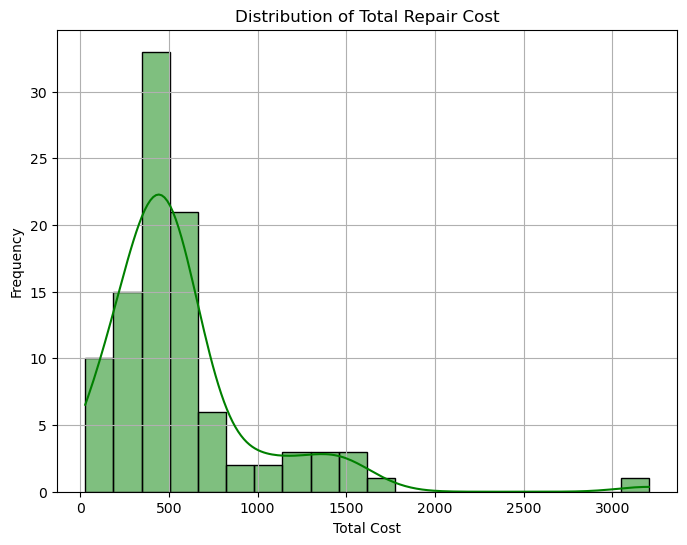

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TOTALCOST'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Repair Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

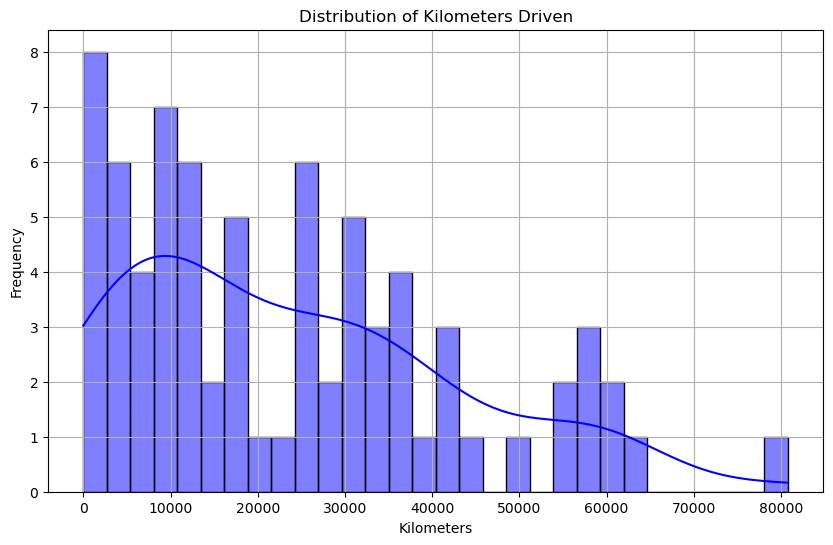

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['KM'], bins=30, kde=True, color='blue')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Generating tags/features
## For both the text column i.e. CORRECTION_VERBATIM and CUSTOMER_VERBATIM

In [27]:
df_cleaned

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3hcfdde89sh220903,13021.0,replaced steering wheel now okay,steering wheel coming apart,2024-01-02,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,...,s2210121cnjx0941,2.808908e+09,6.0,1.0,n,cf10543,NaN,21.0,0.0,1.0
3,3hcfdfel3sh241701,13021.0,steering wheel replacement,customer states the lettering and finish on th...,2024-01-04,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,...,s1210822ckjx0291,2.808892e+09,6.0,1.0,y,cf10543,NaN,10.0,0.0,1.0
4,1hrffhel1rz181474,13021.0,replaced steering message no longer displayed,c/s: customer states the service driver assist...,2024-01-05,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1cgf,...,r2212982ckjx0282,2.808902e+09,8.0,1.0,n,tf10543,NaN,10.0,0.0,1.0
5,3hrffhed7rh167541,13026.0,remove and replace steering wheel wire harness,horn and steering wheel switches are inoperable,2024-01-05,harness asm-strg whl horn sw wrg,steering wheel horn switch wiring harness repl...,full-size trucks,crew cab,t1cgf,...,s2212992ckjx2842,2.809498e+09,6.0,1.0,n,tf10543,NaN,16.0,0.0,1.0
7,3hcfdfed4sh352945,13021.0,replaced steering wheel,special order part [ steering wheel heated ste...,2024-01-05,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,...,s1212982ckjx2188,2.808882e+09,4.0,1.0,n,cf10543,NaN,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3hrs9eed0lh255650,13041.0,replaced applique,customer states the finish on the steering whe...,2024-02-07,applique asm-strg whl tr spoke cvr *synthesis,steering wheel spoke cover replacement,full-size utility,4 door utility,t1ycf,...,s2222082ckjx2928,2.820789e+09,4.0,1.0,n,cf10906,NaN,10.0,0.0,1.0
96,1hykssrl4sz003381,13048.0,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,wheel asm-strg *backen blackk,steering wheel replacement,bev,4 door utility,l233-lsop,...,unknown,2.822282e+09,6.0,1.0,n,6mb26,unknown,10.0,0.0,1.0
97,1hkknxls3sz128369,13044.0,replace steering wheel pra 496735300000,customer statescustomer states vehicle steerin...,2024-02-07,wheel asm-strg *black,steering wheel replacement,crossover suv,4 door utility,c1ug,...,21222222skbp0119,2.822042e+09,4.0,1.0,n,tnn26,denali,10.0,0.0,1.0
98,1hc4wle78rf260518,13045.0,removed steering wheel and disassembled and fo...,customer states there is clicking type noise c...,2024-02-07,unknown,steering wheel replacement,full-size trucks,crew cab,t1cch,...,y0212811mrfx0180,2.820880e+09,6.0,1.0,n,cc20943,NaN,14.0,0.0,1.0


## For CORRECTION_VERBATIM

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

C:\Users\tanis\AppData\Local\Temp\ipykernel_620\3472361208.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['processed_text'] = df_cleaned['CORRECTION_VERBATIM'].apply(process_text)


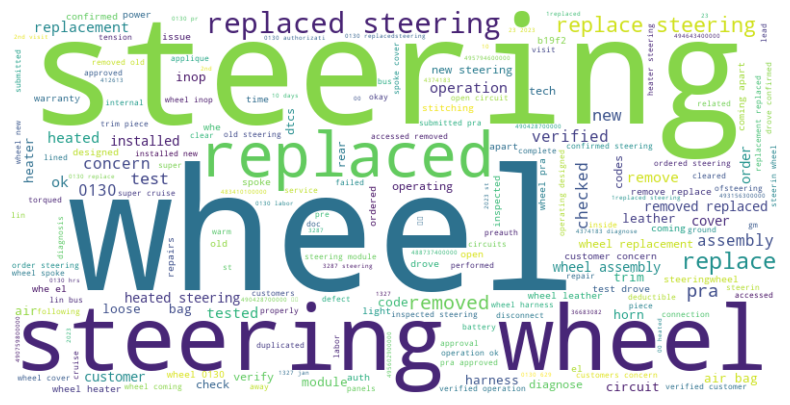

In [32]:
print(df_cleaned.columns)
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric words
    return ' '.join(tokens)

df_cleaned['processed_text'] = df_cleaned['CORRECTION_VERBATIM'].apply(process_text)

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # Unigrams and bigrams
X = vectorizer.fit_transform(df_cleaned['processed_text'])

terms = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1  # Sum the counts of each term across all rows
term_freq = dict(zip(terms, counts))

sorted_terms = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Most Common Tags in 'CORRECTION_VERBATIM':")
for term, freq in sorted_terms[:10]:
    print(f"{term}: {freq}")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## For CUSTOMER_VERBATIM

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

C:\Users\tanis\AppData\Local\Temp\ipykernel_620\1686019737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['processed_text'] = df_cleaned['CUSTOMER_VERBATIM'].apply(process_text)


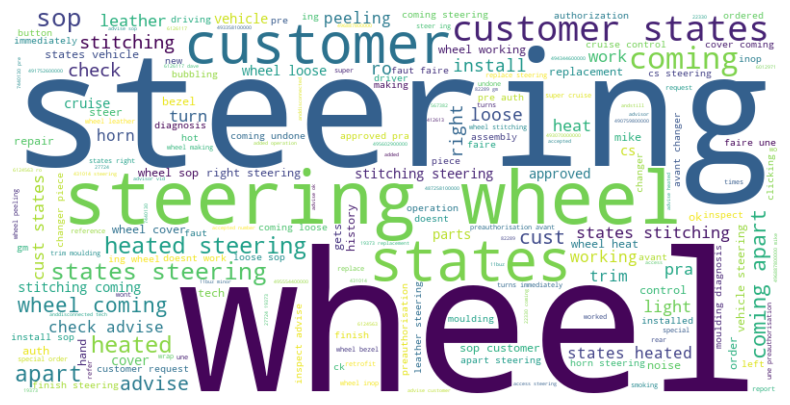

In [37]:
print(df_cleaned.columns)
stop_words = set(stopwords.words('english'))
def process_text(text):
    tokens = word_tokenize(text.lower())  
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  
    return ' '.join(tokens)
    
df_cleaned['processed_text'] = df_cleaned['CUSTOMER_VERBATIM'].apply(process_text)

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2)) 

X = vectorizer.fit_transform(df_cleaned['processed_text'])
terms = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1  # Sum the counts of each term across all rows
term_freq = dict(zip(terms, counts))
sorted_terms = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Most Common Tags in 'CUSTOMER_VERBATIM':")

for term, freq in sorted_terms[:10]:
    print(f"{term}: {freq}")
    
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Summary and Insights

## Analysis of CORRECTION_VERBATIM tags: 
steering, steering component, and wheel have shown frequent mentions. Thus, these are some common troubles occurring with these parts. In fact, replacement and removal actions are more often made with steering components. In that case, the meaning of "pra" seems to be worthy of a more detailed analysis for their repair context.

Recommendation:
Steering and wheels: investigate their durability regarding recurrence in failures.
Streamline the replacement process for cost-effectiveness and efficiency.
Analyze "pra" for clarity in relation to repair actions.
Differences and Approach:
Research vague terms such as "pra" and make sure missing data is treated the same.

## The analysis of the CUSTOMER_VERBATIM tags:
indicates frequent mentions of steering and wheel, similar to the correction tags, suggesting ongoing customer complaints related to these parts. Terms like "states" and "customer states" point to specific issues being reported by customers, with several mentions of "coming", possibly referring to ongoing or future issues.

Recommendations:
Focus on improving steering and wheel durability based on customer feedback to reduce complaints.
Improve customer communication by identifying specific complaints that were mentioned, such as "states steering".
Track recurring complaints such as "coming" to determine if they are predictive of future problems.
Inconsistencies and Methodology:
Complaints such as "coming" and "states steering" need to be looked into more for the right context.
There did not appear to be any issues with null values in this column, but unusual or inconsistent terms should be closely watched.


In [30]:

def generate_tags(text, top_n=3):
    X = vectorizer.transform([text])  
    terms = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1  
    term_freq = dict(zip(terms, counts))
    
    
    sorted_terms = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
    top_terms = [term for term, _ in sorted_terms[:top_n]]
    
    return ' '.join(top_terms)

df_cleaned['tags'] = df_cleaned['processed_text'].apply(generate_tags)

df_cleaned.to_excel('cleaned_data_with_tags.xlsx', index=False)

print("Data saved to cleaned_data_with_tags.xlsx successfully.")


Data saved to cleaned_data_with_tags.xlsx successfully.


C:\Users\tanis\AppData\Local\Temp\ipykernel_620\3492861178.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tags'] = df_cleaned['processed_text'].apply(generate_tags)
